<a href="https://colab.research.google.com/github/sayevvv/machineLearning/blob/main/JS4_Kuis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q ucimlrepo

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [24]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [25]:
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Data Size
df.shape

(48842, 15)

In [6]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [12]:
# nomer 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [26]:
#nomer 2
print("\n=== Kolom yang memiliki Missing Values ===")
print(df.isnull().sum())


=== Kolom yang memiliki Missing Values ===
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [27]:
#nomer 1
# 1. Identifikasi kolom yang memiliki missing values
missing_values = df.isnull().sum()
missing_cols = missing_values[missing_values > 0]
print("=== Kolom dengan Missing Values ===")
print(missing_cols)

=== Kolom dengan Missing Values ===
workclass         963
occupation        966
native-country    274
dtype: int64


In [28]:
# Imputasi sederhana TANPA chained assignment
for col in missing_cols.index:
    if df[col].dtype in ['float64', 'int64']:
        # Imputasi dengan mean untuk numerik
        df[col] = df[col].fillna(df[col].mean())
        print(f"Imputasi numerik pada kolom '{col}' dengan mean: {df[col].mean()}")
    else:
        # Imputasi dengan mode untuk kategorikal
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)
        print(f"Imputasi kategorikal pada kolom '{col}' dengan mode: {mode_value}")

Imputasi kategorikal pada kolom 'workclass' dengan mode: Private
Imputasi kategorikal pada kolom 'occupation' dengan mode: Prof-specialty
Imputasi kategorikal pada kolom 'native-country' dengan mode: United-States


In [29]:
# nomer 2
# Verifikasi hasil akhir
print("\n=== Cek Missing Values Setelah Imputasi ===")
print(df.isnull().sum())


=== Cek Missing Values Setelah Imputasi ===
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [30]:
# Identifikasi Kolom kualitatif

# Ambil semua kolom kategorikal
categorical_cols = df.select_dtypes(include='object').columns
print("Kolom kategorikal:", list(categorical_cols))


Kolom kategorikal: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


In [32]:
# 2. Simpan unique values tiap kolom ke dalam dictionary
#    Ini berguna agar kita bisa melihat isi awal sebelum pembersihan
unique_values = {col: df[col].unique() for col in categorical_cols}

print("\n=== Unique Values Sebelum Pembersihan ===")
for col, values in unique_values.items():
    print(f"\nKolom: {col}")
    print(values)


=== Unique Values Sebelum Pembersihan ===

Kolom: workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Kolom: education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Kolom: marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Kolom: occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

Kolom: relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

Kolom: race
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

Kolom: sex
['Male' 'Female']

Kolom: native-country
[

In [33]:
# 3. Daftar nilai yang dianggap tidak sesuai (invalid)
#    Misalnya tanda '?' atau 'Unknown'
invalid_values = ['?', 'Unknown', 'unknown', 'N/A', 'na']

In [34]:
# ===========================================================
# 4. Membersihkan setiap kolom kategorikal secara otomatis
#    a. Jika ada invalid value -> ganti dengan 'Others'
#    b. Normalisasi penulisan -> Title Case
# ===========================================================
for col in categorical_cols:
    # --- 4a. Ganti nilai invalid menjadi 'Others'
    df[col] = df[col].replace(invalid_values, 'Others')

    # --- 4b. Normalisasi teks untuk konsistensi
    df[col] = df[col].str.strip()   # Hapus spasi di awal/akhir
    df[col] = df[col].str.title()   # Ubah ke format Title Case

    # --- 4c. Tracking progress
    print(f"Kolom '{col}' selesai dibersihkan.")


Kolom 'workclass' selesai dibersihkan.
Kolom 'education' selesai dibersihkan.
Kolom 'marital-status' selesai dibersihkan.
Kolom 'occupation' selesai dibersihkan.
Kolom 'relationship' selesai dibersihkan.
Kolom 'race' selesai dibersihkan.
Kolom 'sex' selesai dibersihkan.
Kolom 'native-country' selesai dibersihkan.
Kolom 'income' selesai dibersihkan.


In [35]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-Gov,77516,Bachelors,13,Never-Married,Adm-Clerical,Not-In-Family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-Emp-Not-Inc,83311,Bachelors,13,Married-Civ-Spouse,Exec-Managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,Hs-Grad,9,Divorced,Handlers-Cleaners,Not-In-Family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11Th,7,Married-Civ-Spouse,Handlers-Cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-Civ-Spouse,Prof-Specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [36]:
# ===========================================================
# 5. Pembersihan khusus berdasarkan temuan pada inspeksi awal
# ===========================================================

# 5a. Kolom income -> hapus tanda titik agar konsisten
df['income'] = df['income'].replace({
    '<=50K.': '<=50K',
    '>50K.': '>50K'
})

# 5b. Perbaiki typo di kolom native-country
df['native-country'] = df['native-country'].replace({
    'Holand-Netherlands': 'Holland-Netherlands'
})

In [37]:
# ===========================================================
# 6. Simpan unique values setelah pembersihan
# ===========================================================
cleaned_unique_values = {col: df[col].unique() for col in categorical_cols}

print("\n=== Unique Values Setelah Pembersihan ===")
for col, values in cleaned_unique_values.items():
    print(f"\nKolom: {col}")
    print(values)


=== Unique Values Setelah Pembersihan ===

Kolom: workclass
['State-Gov' 'Self-Emp-Not-Inc' 'Private' 'Federal-Gov' 'Local-Gov'
 'Others' 'Self-Emp-Inc' 'Without-Pay' 'Never-Worked']

Kolom: education
['Bachelors' 'Hs-Grad' '11Th' 'Masters' '9Th' 'Some-College' 'Assoc-Acdm'
 'Assoc-Voc' '7Th-8Th' 'Doctorate' 'Prof-School' '5Th-6Th' '10Th'
 '1St-4Th' 'Preschool' '12Th']

Kolom: marital-status
['Never-Married' 'Married-Civ-Spouse' 'Divorced' 'Married-Spouse-Absent'
 'Separated' 'Married-Af-Spouse' 'Widowed']

Kolom: occupation
['Adm-Clerical' 'Exec-Managerial' 'Handlers-Cleaners' 'Prof-Specialty'
 'Other-Service' 'Sales' 'Craft-Repair' 'Transport-Moving'
 'Farming-Fishing' 'Machine-Op-Inspct' 'Tech-Support' 'Others'
 'Protective-Serv' 'Armed-Forces' 'Priv-House-Serv']

Kolom: relationship
['Not-In-Family' 'Husband' 'Wife' 'Own-Child' 'Unmarried' 'Other-Relative']

Kolom: race
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

Kolom: sex
['Male' 'Female']

Kolom: native

# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan grafik tampil dengan ukuran besar
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

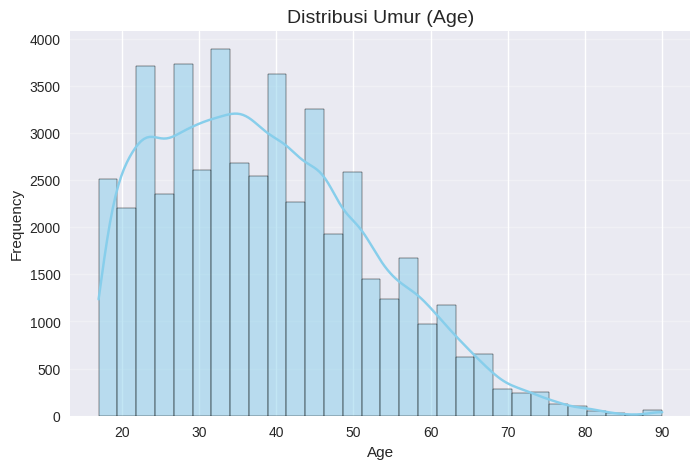

In [39]:
# Jawab 1.1 - Histrogram
# ================================================================
# 1. Histogram pada kolom 'age'
# ================================================================
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title("Distribusi Umur (Age)", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.3)
plt.show()


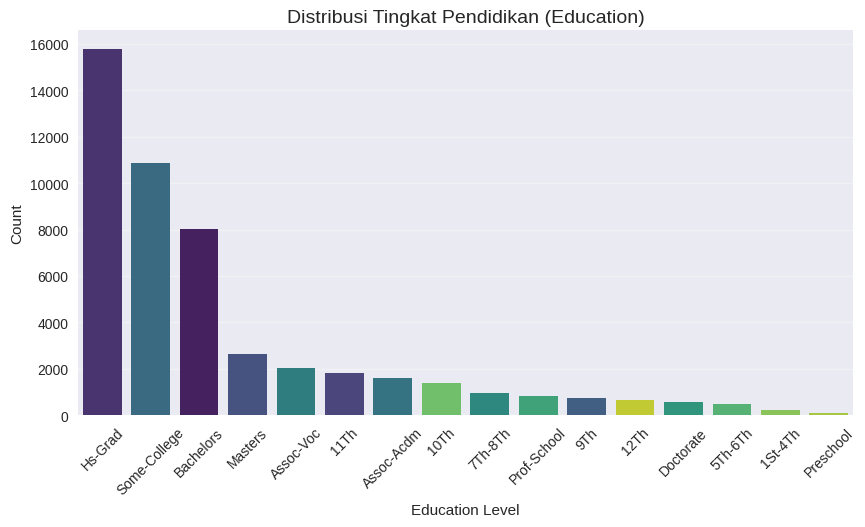

In [41]:
# Jawab 1.2 - Barchart
# ================================================================
# 2. Bar chart pada kolom 'education'
# ================================================================
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='education', hue='education', order=df['education'].value_counts().index, palette="viridis")
plt.title("Distribusi Tingkat Pendidikan (Education)", fontsize=14)
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

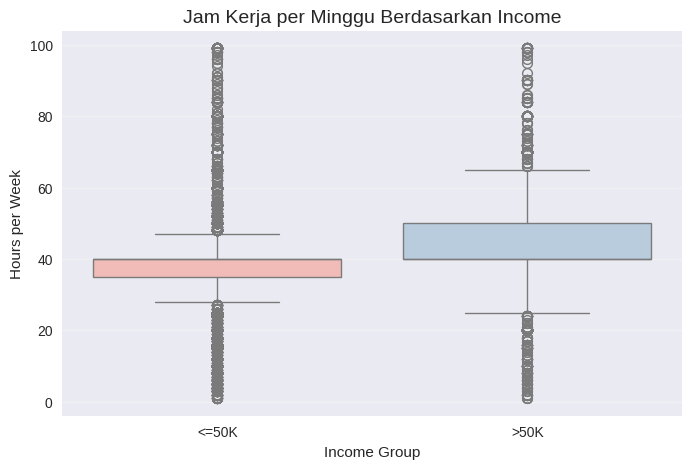

In [43]:
# Jawab 1.3 - Boxplot
# ================================================================
# 3. Boxplot kolom 'income' vs 'hours-per-week'
#    Untuk melihat perbedaan jam kerja berdasarkan kelompok income
# ================================================================
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x='income',
    y='hours-per-week',
    hue='income',       # tambahkan hue agar palette tetap bisa digunakan
    palette="Pastel1",
    legend=False        # nonaktifkan legend yang tidak perlu
)
plt.title("Jam Kerja per Minggu Berdasarkan Income", fontsize=14)
plt.xlabel("Income Group")
plt.ylabel("Hours per Week")
plt.grid(axis='y', alpha=0.3)
plt.show()


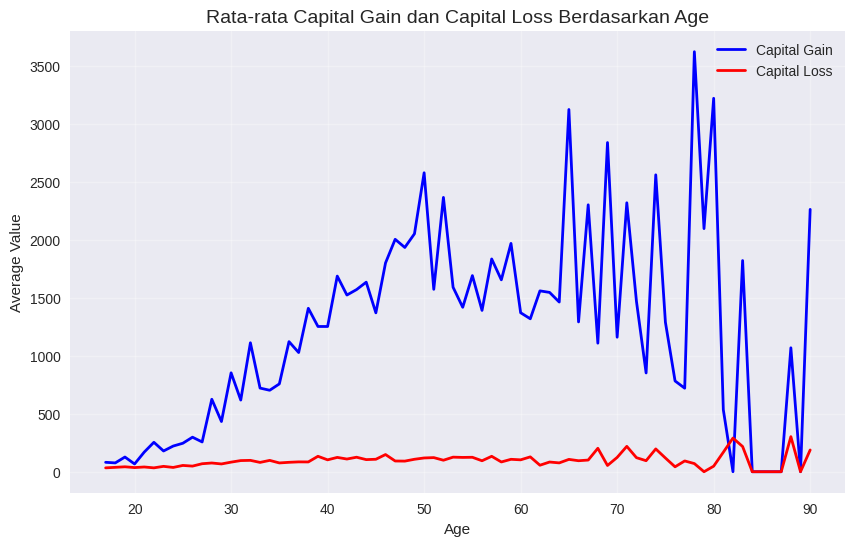

In [44]:
# Jawab 1.4 - Lineplot
# ================================================================
# 4. Lineplot 'age' vs 'capital-gain' & 'capital-loss'
#    Menggunakan 1 grafik dengan 2 garis
# ================================================================
# Agregasi data: rata-rata capital-gain dan capital-loss per age
age_agg = df.groupby('age')[['capital-gain', 'capital-loss']].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(age_agg['age'], age_agg['capital-gain'], label='Capital Gain', color='blue', linewidth=2)
plt.plot(age_agg['age'], age_agg['capital-loss'], label='Capital Loss', color='red', linewidth=2)
plt.title("Rata-rata Capital Gain dan Capital Loss Berdasarkan Age", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Average Value")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

# Jawaban
1. List fenomena di distribusi data 'age'
- Distribusi tidak merata, condong ke kiri  (right skewed).
- Mayoritas individu berada di rentang usia produktif, yaitu 20-45 tahun
- Frekuensi tertinggi berada di usia sekitar 35 tahun
- Penurunan signifikan di usia tua, terutama setelah 50 tahun

2. Menggunakan median, karena histogram right skewed (tidak simetris), jika menggunakan mean, akan mudah terpengaruhi oleh outlier.

3. Kategori <=50K dengan 11706 outlier


In [45]:
# Hitung jumlah outlier pada kolom 'hours-per-week' berdasarkan kategori 'income'
outlier_summary = {}

for income_group in df['income'].unique():
    # Ambil subset data untuk kategori income tertentu
    group_data = df[df['income'] == income_group]['hours-per-week']

    # Hitung Q1, Q3, dan IQR
    Q1 = group_data.quantile(0.25)
    Q3 = group_data.quantile(0.75)
    IQR = Q3 - Q1

    # Tentukan batas bawah dan atas sesuai metode boxplot
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifikasi data yang dianggap outlier
    outliers = group_data[(group_data < lower_bound) | (group_data > upper_bound)]

    # Simpan hasil ke dictionary
    outlier_summary[income_group] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Jumlah Outlier': len(outliers)
    }

# Tampilkan jumlah outlier per kategori income
print("=== Jumlah Outlier per Kategori Income ===")
for group, result in outlier_summary.items():
    print(f"{group}: {result['Jumlah Outlier']} outlier")

# Tentukan kategori dengan jumlah outlier terbanyak
max_outlier_category = max(outlier_summary, key=lambda x: outlier_summary[x]['Jumlah Outlier'])
max_outlier_count = outlier_summary[max_outlier_category]['Jumlah Outlier']

print("\nKategori dengan jumlah outlier terbanyak:")
print(f"{max_outlier_category} dengan {max_outlier_count} outlier")


=== Jumlah Outlier per Kategori Income ===
<=50K: 11706 outlier
>50K: 781 outlier

Kategori dengan jumlah outlier terbanyak:
<=50K dengan 11706 outlier


# Bagian 3 - Encoding Variabel Kategorical
## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target


In [48]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi encoder
le = LabelEncoder()

# Encoding kolom 'sex'
df['sex'] = le.fit_transform(df['sex'])
print("Mapping Sex:", dict(zip(le.classes_, le.transform(le.classes_))))

# Encoding kolom 'income' sebagai target
df['income'] = le.fit_transform(df['income'])
print("Mapping Income:", dict(zip(le.classes_, le.transform(le.classes_))))

# Verifikasi hasil
print("\nHasil encoding:")
print(df[['sex', 'income']].head())


Mapping Sex: {'Female': np.int64(0), 'Male': np.int64(1)}
Mapping Income: {'<=50K': np.int64(0), '>50K': np.int64(1)}

Hasil encoding:
   sex  income
0    1       0
1    1       0
2    1       0
3    1       0
4    0       0


In [51]:
#verifikasi
df[['sex', 'income']].head(30)

,sex,income
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,1
9,1,1


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

=== Matriks Korelasi ===
                     age  education-num  hours-per-week  capital-gain  \
age             1.000000       0.030940        0.071558      0.077229   
education-num   0.030940       1.000000        0.143689      0.125146   
hours-per-week  0.071558       0.143689        1.000000      0.082157   
capital-gain    0.077229       0.125146        0.082157      1.000000   
capital-loss    0.056944       0.080972        0.054467     -0.031441   
income          0.230369       0.332613        0.227687      0.223013   

                capital-loss    income  
age                 0.056944  0.230369  
education-num       0.080972  0.332613  
hours-per-week      0.054467  0.227687  
capital-gain       -0.031441  0.223013  
capital-loss        1.000000  0.147554  
income              0.147554  1.000000  


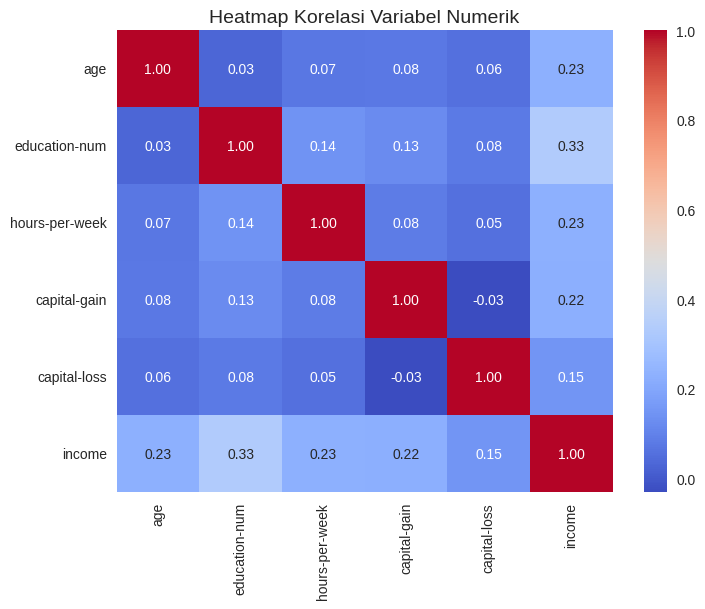

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih kolom yang akan dianalisis
cols_for_corr = ['age', 'education-num', 'hours-per-week',
                 'capital-gain', 'capital-loss', 'income']

# Membuat dataframe khusus
df_corr = df[cols_for_corr]

# Hitung matriks korelasi
corr_matrix = df_corr.corr()

# Tampilkan matriks korelasi
print("=== Matriks Korelasi ===")
print(corr_matrix)

# Visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Variabel Numerik", fontsize=14)
plt.show()


Berdasarkan heatmap, dapat disimpulkan bahwa

1. Pendidikan adalah faktor paling berpengaruh terhadap penghasilan, dengan korelasi 0.33.

2. Age, hours-per-week, dan capital-gain punya kontribusi kecil tetapi masih relevan.

3. Capital-loss hampir tidak mempengaruhi income.

4. Variabel dalam dataset ini relatif independen, sehingga aman dipakai bersama dalam model machine learning tanpa risiko tumpang tindih informasi.


# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [53]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


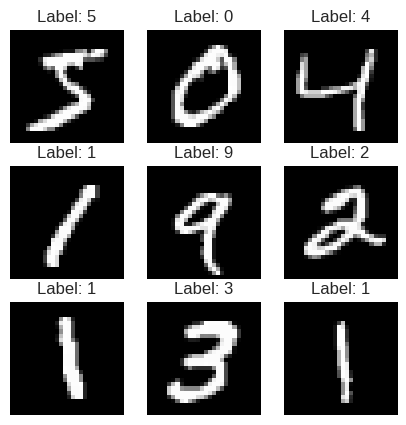

In [54]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

Original X_test shape: (10000, 28, 28)
Upsampled X_test shape: (10000, 32, 32)


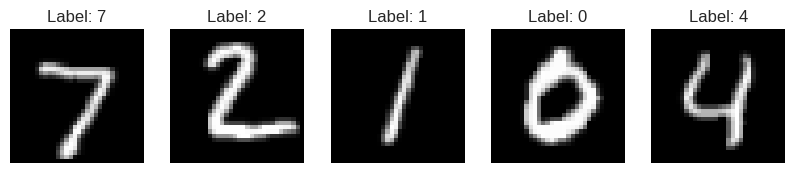

In [56]:
from tensorflow.image import resize
print("Original X_test shape:", X_test.shape)

# --- Step 1: Buat array kosong untuk menampung hasil upsampling ---
# Bentuk akhir: (10000, 32, 32)
X_test_upsampled = np.zeros((X_test.shape[0], 32, 32))

# --- Step 2: Lakukan upsampling ---
for i in range(X_test.shape[0]):
    # Resize tiap citra ke 32x32
    resized_img = resize(np.expand_dims(X_test[i], axis=-1), [32, 32]).numpy()
    X_test_upsampled[i] = resized_img[:, :, 0]  # hanya ambil 1 channel grayscale

print("Upsampled X_test shape:", X_test_upsampled.shape)

# --- Step 3: Tampilkan 5 hasil pertama ---
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test_upsampled[i], cmap='gray')
    plt.title(f"Label: {y_test[i]}")
    plt.axis('off')
plt.show()

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

Min value setelah normalisasi: 0.0
Max value setelah normalisasi: 1.0


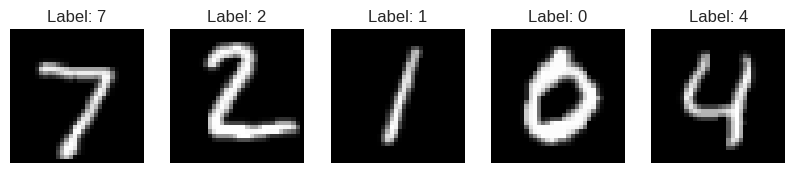

In [57]:
# --- Normalisasi data hasil upsampling ---
# Dari range [0, 255] menjadi [0, 1]
X_test_normalized = X_test_upsampled / 255.0

# Cek hasil normalisasi pada 5 data pertama
print("Min value setelah normalisasi:", X_test_normalized.min())
print("Max value setelah normalisasi:", X_test_normalized.max())

# Visualisasi untuk memastikan citra tetap terlihat sama
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test_normalized[i], cmap='gray')
    plt.title(f"Label: {y_test[i]}")
    plt.axis('off')
plt.show()

## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [58]:
# --- Step 1: Buat array kosong (holder) ---
# Total data = 10000, tiap gambar 32x32 -> hasil flatten = 1024
X_test_flatten = np.zeros((X_test_normalized.shape[0], 32*32))

# --- Step 2: Lakukan proses flatten untuk setiap gambar ---
for i in range(X_test_normalized.shape[0]):
    X_test_flatten[i] = X_test_normalized[i].flatten()

print("Shape setelah flatten:", X_test_flatten.shape)

# --- Step 3: Cek 1 data hasil flatten ---
print("Contoh 1 data flatten (10 nilai pertama):")
print(X_test_flatten[0][:10])


Shape setelah flatten: (10000, 1024)
Contoh 1 data flatten (10 nilai pertama):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


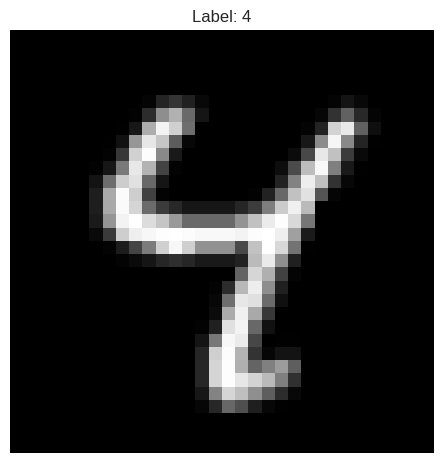

In [65]:
# Visualisasi
plt.imshow(X_test_flatten[6].reshape(32, 32), cmap='gray')
plt.title(f"Label: {y_test[6]}")
plt.axis('off')
plt.show()
